              precision    recall  f1-score   support

больше или 7       0.82      1.00      0.90       760
    Меньше 7       1.00      0.26      0.42       220

    accuracy                           0.83       980
   macro avg       0.91      0.63      0.66       980
weighted avg       0.86      0.83      0.79       980



,1671,1639,1655,1663,1647,1631,1623,1615,1607,1567,...,1531,1563,1595,1659,1627,1651,1643,1611,1587,1579
mean_fit_time,0.0110698,0.0105707,0.0116679,0.01117,0.0111696,0.0109363,0.0109699,0.0110697,0.0105712,0.0107701,...,0.0112688,0.0109696,0.010571,0.0103715,0.0107707,0.0117013,0.0106703,0.0104714,0.0106702,0.0149595
std_fit_time,0.000537864,0.000488549,0.0019474,0.0012456,0.00116329,0.00163066,0.00089215,0.00201682,0.000488665,0.000598567,...,0.00141475,0.00118017,0.000488724,0.000488734,0.000598511,0.00227768,0.00045707,0.000498915,0.0006389,0.0035404
mean_score_time,0.0310169,0.0299204,0.0306182,0.0301192,0.0319147,0.0287681,0.0306183,0.0300201,0.0302193,0.0295208,...,0.0375,0.0381981,0.0380984,0.0392953,0.0386966,0.0391267,0.0388962,0.0382979,0.0372009,0.0550531
std_score_time,0.00272997,0.00109247,0.000638501,0.000746572,0.00194477,0.00328955,0.0013416,0.000698352,0.00118429,0.000913421,...,0.00127726,0.00214157,0.00198475,0.00127711,0.0023938,0.00386485,0.0012615,0.000913998,0.000779152,0.0109051
param_classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...",...,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_classifier__n_neighbors,209,205,207,208,206,204,203,202,201,196,...,192,196,200,208,204,207,206,202,199,198
param_classifier__p,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,"Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')",...,"Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')"
params,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'class

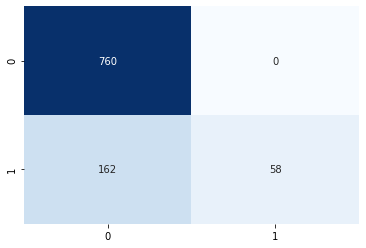

In [2]:
import pandas as pd
data = pd.read_csv("E:/wineQualityWhites.csv")
data = data.drop(data.columns[0], axis=1)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 

from sklearn.metrics import accuracy_score


data = data.assign(split = lambda data:data['quality'].map(lambda quality: 1 if quality >= 7 else 0))

y = data.split
x = data.drop(['split','quality'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

kfold = KFold(n_splits=10, shuffle=True)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])
weights=['uniform','distance']
p = [1]

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': range(1,210), 
     'classifier__weights': weights,
     'classifier__p': p
     }]
    


grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, n_jobs=-1,scoring='precision')
grid.fit(X_train,y_train)
grid.best_params_
y_predict = grid.predict(X_test)
accuracy_score(y_test,y_predict)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=["больше или 7", "Меньше 7"]))

from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix_1=confusion_matrix(y_test,y_predict)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");


gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

In [3]:
grid.best_params_

{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=205, p=1,
                      weights='distance'),
 'classifier__n_neighbors': 205,
 'classifier__p': 1,
 'classifier__weights': 'distance',
 'preprocessing': Normalizer(copy=True, norm='l2')}

# Обучим на 30% от выборки с подобранными параметрами

In [4]:
data = data.assign(split = lambda data:data['quality'].map(lambda quality: 1 if quality >= 7 else 0))

y = data.split
x = data.drop(['split','quality'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.7)

In [5]:
scaler = Normalizer()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [6]:
model = KNeighborsClassifier(n_neighbors=194,p=1,metric='minkowski',weights='distance',algorithm='auto', leaf_size=30)
model.fit(X_train_scaler,y_train)
y_predict = model.predict(X_test_scaler)

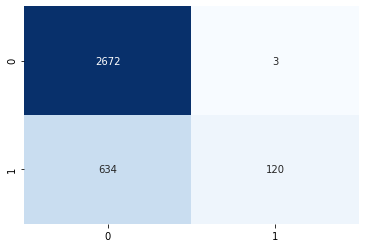

In [7]:
matrix_1=confusion_matrix(y_test,y_predict)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

In [ ]:
#Даже обучившись на 30% от всей выборки результат отличный.

# Часть 2. Проверка других моделей.

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.preprocessing import PolynomialFeatures, Binarizer
from sklearn.metrics import precision_score, f1_score

In [ ]:
#Попробовать полиномиальный фичинг

In [114]:
X = x
X_train, X_test, y_train, y_test = train_test_split(X,y)

# SVC

In [102]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', RandomForestClassifier())])

param_grid =[{'classifier': [SVC()], 
     'preprocessing': [None, StandardScaler(), MinMaxScaler(), Normalizer()],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='precision')
grid.fit(X_train,y_train);

In [115]:
precision_score(grid.predict(X_test),y_test)

0.891566265060241

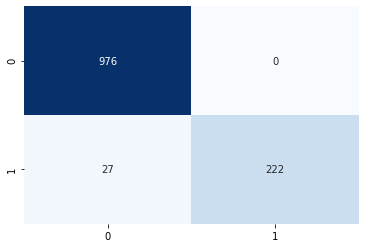

In [117]:
matrix_1=confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

# RandomForestClassifier

In [118]:
param_grid=[{'classifier': [RandomForestClassifier()],
     'classifier__n_estimators':[100,300,500],
     'preprocessing': [None], 
     'classifier__max_features': [1, 2, 3, 4]}]

In [119]:
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='precision')
grid.fit(X_train,y_train);
precision_score(grid.predict(X_test),y_test)

0.5742971887550201

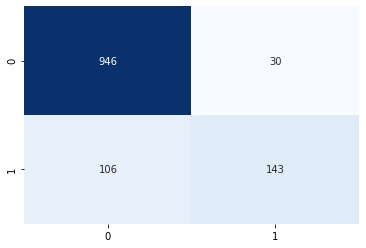

In [120]:
matrix_1=confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

# XGBClassifier

In [121]:
param_grid=[{'classifier': [XGBClassifier()],
     'preprocessing': [None], 
     'classifier__max_depth': [1, 2, 3, 4, 5],
     'classifier__n_estimators':[100,300,500],
     'classifier__learning_rate':[0.05, 0.1, 0.2]
    }]

In [122]:
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='precision')
grid.fit(X_train,y_train);
precision_score(grid.predict(X_test),y_test)

0.6184738955823293

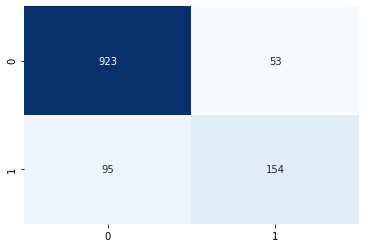

In [123]:
matrix_1=confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

# LogisticRegression

In [140]:
param_grid=[{'classifier': [LogisticRegression()],
     'preprocessing': [None, StandardScaler(), MinMaxScaler(), Normalizer()],
     'classifier__penalty':['l1','l2'],
     'classifier__C':[0.1,0.5,1]        
    }]

In [144]:
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='precision')
grid.fit(X_train,y_train);
f1_score(grid.predict(X_test),y_test)

0.12546125461254615

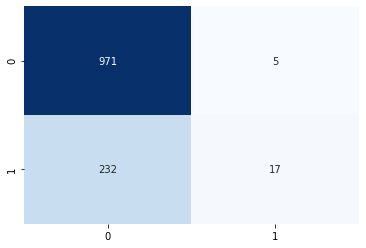

In [142]:
matrix_1=confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

# Naive Bayes (BernoulliNB)

In [137]:
param_grid=[{'classifier': [BernoulliNB()],
     'preprocessing':[None,Binarizer()],
     'classifier__alpha':[0.1,0.5,1]
    }]

In [138]:
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid.fit(X_train,y_train);
precision_score(grid.predict(X_test),y_test)

0.0

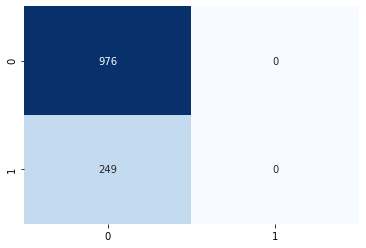

In [139]:
matrix_1=confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

### Что-то странное

# Попробуем SVC (как лучшую модель) с полиномиальным фичингом

In [148]:
poly = PolynomialFeatures(2,interaction_only=True,include_bias=False)
X_transform = poly.fit_transform(X)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_transform,y)

In [150]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', RandomForestClassifier())])

param_grid =[{'classifier': [SVC()], 
     'preprocessing': [None, StandardScaler(), MinMaxScaler(), Normalizer()],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [151]:
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='precision')
grid.fit(X_train,y_train);
precision_score(grid.predict(X_test),y_test)

0.3148148148148148

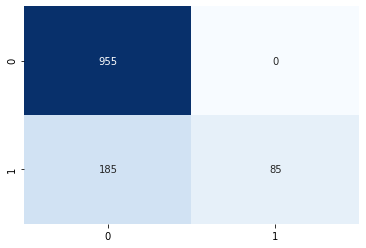

In [152]:
matrix_1=confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

# Стало хуже